<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Padulles Dynamic Model I

### Version 1.4

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <ul>
        <li><a href="#FC-Voltage">FC Voltage</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions :    


<ol>    
<li>The stack is fed with hydrogen and air</li>   
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>   
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li> 
</ol>

</p>

<p style="text-align:justify;">
In this model, Nernst and fuel cell potential were modeled as a function of oxygen and hydrogen gases partial pressure that can be calculated from independent variables or constants. The partial pressure of gases is proportional to the molar flow of each gas.
</p>

<div style="text-align:center;">
    
<img src="images/Padulles-Diagram.jpg" onerror='this.src="../images/Padulles-Diagram.jpg"'>  
<p style="text-align:center;">Fig1. Padulles-1 Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(P_{H_2}\times \sqrt{P_{O_2}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

In [1]:
from opem.Dynamic.Padulles1 import Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,Enernst_Calc

In [2]:
Kr=Kr_Calc(N0=88)
Kr

2.2801566260315118e-07

In [3]:
qO2=qO2_Calc(qH2=0.0004,rho=1.168)
qO2

0.0003424657534246576

In [4]:
PH2=PH2_Calc(KH2=0.0000422,tH2=3.37,Kr=Kr,I=1,qH2=0.0004)
PH2

2.166559852694447

In [5]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

2.0955811367185566

In [6]:
Enernst=Enernst_Calc(E0=0.6,N0=88,T=343, PH2=PH2, PO2=PO2)
Enernst

54.28658891467849

### FC Voltage

$$V_{Fuelcell}=E_{Nernst}-Bln(Ci)-(R^{int}\times i)$$

In [7]:
from opem.Dynamic.Padulles1 import Vcell_Calc
FC_Voltage=Vcell_Calc(Enernst=Enernst, B=0.04777,C=0.0136,I=1,Rint=0.00303)
FC_Voltage

54.48885935035618

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [8]:
from opem.Dynamic.Padulles1 import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

108.97771870071236

In [9]:
Power_Thermal_Calc(VStack=FC_Voltage,N=88,i=2)

107.50228129928763

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [10]:
from opem.Dynamic.Padulles1 import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=88)

0.39691768174793257

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0 to `i`=100 with `step`=0.1

In [11]:
Test_Vector = {
    "T": 343,
    "E0": 0.6,
    "N0": 88,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "tH2": 3.37,
    "tO2": 6.74,
    "B": 0.04777,
    "C": 0.0136,
    "Rint": 0.00303,
    "rho": 1.168,
    "qH2": 0.0004,
    "i-start": 0,
    "i-stop": 100,
    "i-step": 0.1,
    "Name": "PadullesI_Test"}


* Notice : "Name", new in version 0.5

In [12]:
from opem.Dynamic.Padulles1 import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-I-Model Simulation
###########
Analyzing . . .
[Error] Vcell Calculation Error (Enernst:54.28850557413407, B:0.04777, C:0.0136, I:0, Rint:0.00303)
[Error] PEM Efficiency Calculation Failed (Vcell:None, N:88)
[Error] Power Calculation Error (Vcell:None, i:0)
I : 0
E : 54.28850557413407 V
FC Efficiency : None 
FC Power : None W
FC Voltage : None V
PH2 : 2.169032719858579 atm
PO2 : 2.0969773162414582 atm
Power-Thermal : None W
###########
I : 0.1
E : 54.288313997298886 V
FC Efficiency : 0.3977513543332525 
FC Power : 5.4603305922868905 W
FC Voltage : 54.6033059228689 V
PH2 : 2.168785433142166 atm
PO2 : 2.096837698289168 atm
Power-Thermal : 5.36366940771311 W
###########
I : 0.2
E : 54.28812240067271 V
FC Efficiency : 0.39750655365258875 
FC Power : 10.913939937085477 W
FC Voltage : 54.56969968542738 V
PH2 : 2.1685381464257527 atm
PO2 : 2.096698080336878 atm
Power-Thermal : 10.734060062914523 W
###########
I : 0.3
E : 54.287930784251316 V
FC Efficiency : 0.397361858980


Power-Thermal : 836.2873432762378 W
###########
I : 15.6
E : 54.25837764949904 V
FC Efficiency : 0.3954339521678521 
FC Power : 846.8486980762027 W
FC Voltage : 54.28517295360274 V
PH2 : 2.1304559920981148 atm
PO2 : 2.0751969156841934 atm
Power-Thermal : 841.6953019237972 W
###########
I : 15.7
E : 54.2581829331216 V
FC Efficiency : 0.39542810312186866 
FC Power : 852.264608946151 W
FC Voltage : 54.284369996570135 V
PH2 : 2.130208705381701 atm
PO2 : 2.0750572977319033 atm
Power-Thermal : 847.1033910538488 W
###########
I : 15.8
E : 54.25798819627442 V
FC Efficiency : 0.3954222680442653 
FC Power : 857.6803895224444 W
FC Voltage : 54.283568957116735 V
PH2 : 2.129961418665288 atm
PO2 : 2.074917679779613 atm
Power-Thermal : 852.5116104775556 W
###########
I : 15.9
E : 54.257793438953 V
FC Efficiency : 0.3954164467568688 
FC Power : 863.096039991449 W
FC Voltage : 54.28276981078295 V
PH2 : 2.129714131948875 atm
PO2 : 2.074778061827323 atm
Power-Thermal : 857.919960008551 W
###########
I :

Power-Thermal : 1437.3360948019672 W
###########
I : 26.7
E : 54.23663816404028 V
FC Efficiency : 0.3948435986392666 
FC Power : 1447.2502502060004 W
FC Voltage : 54.20412922119852 V
PH2 : 2.1030071665762455 atm
PO2 : 2.0596993229799856 atm
Power-Thermal : 1442.7577497939992 W
###########
I : 26.8
E : 54.236441147918484 V
FC Efficiency : 0.39483865548826846 
FC Power : 1452.6524767615106 W
FC Voltage : 54.2034506254295 V
PH2 : 2.1027598798598324 atm
PO2 : 2.0595597050276955 atm
Power-Thermal : 1448.1795232384893 W
###########
I : 26.9
E : 54.236244110821914 V
FC Efficiency : 0.39483371702934406 
FC Power : 1458.0545849249065 W
FC Voltage : 54.20277267378835 V
PH2 : 2.1025125931434188 atm
PO2 : 2.059420087075406 atm
Power-Thermal : 1453.6014150750932 W
###########
I : 27.0
E : 54.23604705274593 V
FC Efficiency : 0.39482878322650494 
FC Power : 1463.4565747560341 W
FC Voltage : 54.2020953613346 V
PH2 : 2.102265306427006 atm
PO2 : 2.0592804691231152 atm
Power-Thermal : 1459.0234252439657 


###########
I : 37.8
E : 54.21464028556451 V
FC Efficiency : 0.3943173901180782 
FC Power : 2046.1854917224896 W
FC Voltage : 54.13189131540978 V
PH2 : 2.0755583410543763 atm
PO2 : 2.044201730275778 atm
Power-Thermal : 2045.28650827751 W
###########
I : 37.9
E : 54.214440912583555 V
FC Efficiency : 0.3943128112881467 
FC Power : 2051.574857604834 W
FC Voltage : 54.13126273363678 V
PH2 : 2.075311054337963 atm
PO2 : 2.044062112323488 atm
Power-Thermal : 2050.7211423951658 W
###########
I : 38.0
E : 54.21424151810339 V
FC Efficiency : 0.39430823472414744 
FC Power : 2056.964109591376 W
FC Voltage : 54.130634462930956 V
PH2 : 2.07506376762155 atm
PO2 : 2.043922494371198 atm
Power-Thermal : 2056.1558904086232 W
###########
I : 38.1
E : 54.21404210211922 V
FC Efficiency : 0.3943036604133118 
FC Power : 2062.353247708653 W
FC Voltage : 54.13000650153944 V
PH2 : 2.074816480905137 atm
PO2 : 2.0437828764189074 atm
Power-Thermal : 2061.590752291347 W
###########
I : 38.2
E : 54.21384266462621 V


###########
I : 48.9
E : 54.19237755381945 V
FC Efficiency : 0.3938206317254316 
FC Power : 2643.7147502077687 W
FC Voltage : 54.06369632326725 V
PH2 : 2.0481095155325075 atm
PO2 : 2.0287041375715704 atm
Power-Thermal : 2649.221249792231 W
###########
I : 49.0
E : 54.19217576465432 V
FC Efficiency : 0.3938162437696042 
FC Power : 2649.091603289872 W
FC Voltage : 54.06309394469127 V
PH2 : 2.0478622288160944 atm
PO2 : 2.0285645196192803 atm
Power-Thermal : 2654.6683967101276 W
###########
I : 49.1
E : 54.19197395344516 V
FC Efficiency : 0.3938118571024944 
FC Power : 2654.468344582794 W
FC Voltage : 54.06249174303043 V
PH2 : 2.0476149420996808 atm
PO2 : 2.02842490166699 atm
Power-Thermal : 2660.1156554172057 W
###########
I : 49.2
E : 54.191772120186926 V
FC Efficiency : 0.393807471718168 
FC Power : 2659.8449740995293 W
FC Voltage : 54.0618897174701 V
PH2 : 2.047367655383268 atm
PO2 : 2.0282852837146996 atm
Power-Thermal : 2665.563025900471 W
###########
I : 49.3
E : 54.19157026487463 V


I : 60.0
E : 54.16984325683484 V
FC Efficiency : 0.3933403034147376 
FC Power : 3239.8654111665105 W
FC Voltage : 53.997756852775176 V
PH2 : 2.0206606900106383 atm
PO2 : 2.0132065448673626 atm
Power-Thermal : 3254.534588833489 W
###########
I : 60.1
E : 54.16963898983297 V
FC Efficiency : 0.39333602881250174 
FC Power : 3245.229919126353 W
FC Voltage : 53.99717003538024 V
PH2 : 2.020413403294225 atm
PO2 : 2.0130669269150725 atm
Power-Thermal : 3259.9940808736474 W
###########
I : 60.2
E : 54.16943470022067 V
FC Efficiency : 0.3933317550089473 
FC Power : 3250.594316323223 W
FC Voltage : 53.99658332762829 V
PH2 : 2.020166116577812 atm
PO2 : 2.0129273089627824 atm
Power-Thermal : 3265.453683676777 W
###########
I : 60.3
E : 54.16923038799272 V
FC Efficiency : 0.3933274820008382 
FC Power : 3255.9586027632267 W
FC Voltage : 53.995996729075074 V
PH2 : 2.019918829861399 atm
PO2 : 2.0127876910104923 atm
Power-Thermal : 3270.9133972367727 W
###########
I : 60.4
E : 54.16902605314393 V
FC Eff

I : 71.1
E : 54.1470304174573 V
FC Efficiency : 0.3928700641102536 
FC Power : 3834.650690715054 W
FC Voltage : 53.93320240105562 V
PH2 : 1.9932118644887693 atm
PO2 : 1.997708952163155 atm
Power-Thermal : 3861.213309284945 W
###########
I : 71.2
E : 54.14682360851311 V
FC Efficiency : 0.39286586139463125 
FC Power : 3840.0029322005544 W
FC Voltage : 53.932625452254975 V
PH2 : 1.9929645777723561 atm
PO2 : 1.9975693342108647 atm
Power-Thermal : 3866.6850677994457 W
###########
I : 71.3
E : 54.1466167763694 V
FC Efficiency : 0.3928616591964323 
FC Power : 3845.3550633608675 W
FC Voltage : 53.932048574486224 V
PH2 : 1.9927172910559428 atm
PO2 : 1.9974297162585748 atm
Power-Thermal : 3872.156936639132 W
###########
I : 71.4
E : 54.146409921020776 V
FC Efficiency : 0.39285745751369344 
FC Power : 3850.7070841980603 W
FC Voltage : 53.931471767479835 V
PH2 : 1.9924700043395298 atm
PO2 : 1.9972900983062847 atm
Power-Thermal : 3877.62891580194 W
###########
I : 71.5
E : 54.14620304246179 V
FC Ef


E : 54.12393177896357 V
FC Efficiency : 0.39240632915109086 
FC Power : 4428.076259173837 W
FC Voltage : 53.86954086586176 V
PH2 : 1.9657630389669003 atm
PO2 : 1.9822113594589472 atm
Power-Thermal : 4469.251740826163 W
###########
I : 82.3
E : 54.12372236138446 V
FC Efficiency : 0.39240217343566525 
FC Power : 4433.416261389121 W
FC Voltage : 53.86897036924813 V
PH2 : 1.9655157522504871 atm
PO2 : 1.9820717415066573 atm
Power-Thermal : 4474.735738610878 W
###########
I : 82.4
E : 54.12351291999281 V
FC Efficiency : 0.3923980180605264 
FC Power : 4438.756153354363 W
FC Voltage : 53.86839991934906 V
PH2 : 1.965268465534074 atm
PO2 : 1.981932123554367 atm
Power-Thermal : 4480.2198466456375 W
###########
I : 82.5
E : 54.123303454783 V
FC Efficiency : 0.39239386302438667 
FC Power : 4444.095935068995 W
FC Voltage : 53.86782951598781 V
PH2 : 1.9650211788176606 atm
PO2 : 1.9817925056020769 atm
Power-Thermal : 4485.704064931006 W
###########
I : 82.6
E : 54.12309396574936 V
FC Efficiency : 0.3

E : 54.100539789674976 V
FC Efficiency : 0.3919468611509362 
FC Power : 5020.143193718088 W
FC Voltage : 53.806465098800516 V
PH2 : 1.9383142134450313 atm
PO2 : 1.9667137667547396 atm
Power-Thermal : 5078.648806281912 W
###########
I : 93.4
E : 54.100327694037944 V
FC Efficiency : 0.39194273623363757 
FC Power : 5025.470950736362 W
FC Voltage : 53.805898830153765 V
PH2 : 1.9380669267286181 atm
PO2 : 1.9665741488024495 atm
Power-Thermal : 5084.145049263638 W
###########
I : 93.5
E : 54.10011557395007 V
FC Efficiency : 0.39193861153712095 
FC Power : 5030.798597334793 W
FC Voltage : 53.80533259181597 V
PH2 : 1.9378196400122047 atm
PO2 : 1.9664345308501592 atm
Power-Thermal : 5089.641402665206 W
###########
I : 93.6
E : 54.09990342940549 V
FC Efficiency : 0.3919344870604907 
FC Power : 5036.126133510966 W
FC Voltage : 53.804766383664166 V
PH2 : 1.9375723532957916 atm
PO2 : 1.966294912897869 atm
Power-Thermal : 5095.1378664890335 W
###########
I : 93.7
E : 54.099691260398316 V
FC Efficienc

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [13]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-I-Model Simulation
###########
Analyzing . . .
[Error] Vcell Calculation Error (Enernst:54.28850557413407, B:0.04777, C:0.0136, I:0, Rint:0.00303)
[Error] PEM Efficiency Calculation Failed (Vcell:None, N:88)
[Error] Power Calculation Error (Vcell:None, i:0)
Done!


In [14]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-I Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "PrintMode" & "ReportMode" , new in version 0.5

* Notice : "Folder" , new in version 1.4

## Plot

In [15]:
import sys
!{sys.executable} -m pip -qqq install matplotlib;
import matplotlib.pyplot as plt

In [16]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


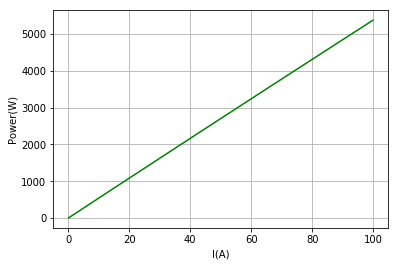

In [17]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

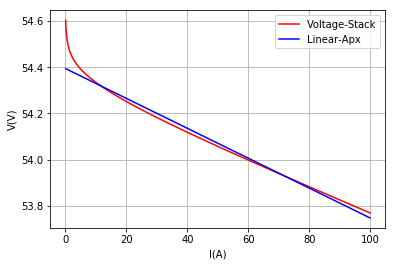

In [18]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

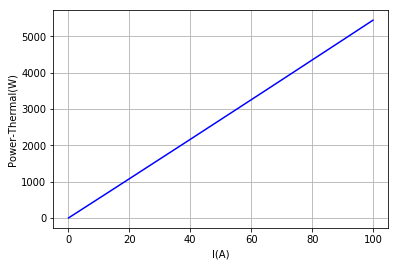

In [19]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

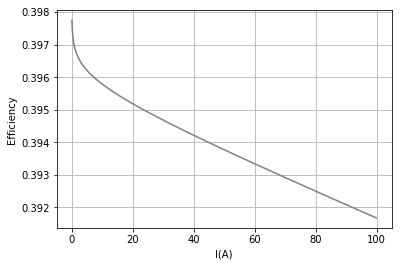

In [20]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

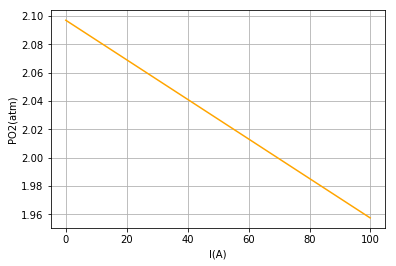

In [21]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

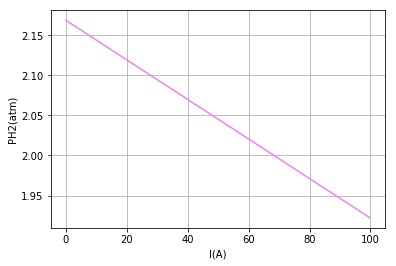

In [22]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

<a href="Padulles-I/PadullesI_Test.html">HTML File</a>

<a href="Padulles-I/PadullesI_Test.opem">OPEM File</a>

<a href="Padulles-I/PadullesI_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Fuel cell temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Activation voltage constant</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$C$$</td>
        <td style="text-align:center;">Activation constant parameter</td>
        <td>$$A^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">Fuel cell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9.
</blockquote>